# Chapter 11 시계열
- 시계열(time series): 시간상의 여러 지점을 관측하거나 측정할 수 있는 모든 데이터.
- 금융, 경제, 생태학, 신경 과학, 물리학 등 여러 다양한 분야에서 사용되는 매우 중요한 구조화된 데이터
- 대부분의 시계열은 고정 빈도로 표현되며 특정 규칙(15초, 5분, 한 달에 한 번 등)에 따른 일괄적인 간격으로 데이터 존재
- 시계열은 고정된 시간 단위나 단위들 간의 간격으로 존재하지 않고 불규칙적으로 표현될 수도 있음
- 타임스탬프로 색인된 데이터가 가장 단순하고 널리 사용됨.

[시계열 데이터를 표시하고 참조하는 방식]
- 시간 내에서 특정 순간의 타임스탬프
- 고정된 기간 (예. 2017년 1월, 2020년 전체)
- 시작과 끝 타임스템프로 표시되는 시간 간격. 기간은 시간 간격의 특수한 경우로 생각
- 실험 혹은 경과 시간. 각 타임스탬프는 0부터 시작해 특정 시작 시간에 상대적인 시간의 측정값(예. 쿠키를 오븐에 넣은 시점부터 초당 커지는 쿠키의 지름)

[판다스 시계열]
- 표준 시계열 도구와 데이터 알고리즘 제공
- 대량의 시계열 데이터 효과적으로 다룰 수 있음(나누기, 집계 등)
- 불규칙적이며 고정된 빈도를 갖는 시계열 리샘플링
- 금융이나 경제 관련 애플리케이션, 서버 로그 데이터 분석 등에 용이

In [114]:
import pandas as pd
import numpy as np

In [115]:
# 저자 깃허브 주소
path_ex = 'https://raw.githubusercontent.com/wesm/pydata-book/refs/heads/3rd-edition/examples/'
path_da = 'https://raw.githubusercontent.com/wesm/pydata-book/refs/heads/3rd-edition/datasets/'

In [116]:
# 구글 드라이브 주소(examples)
path_gg_ex = '/content/drive/MyDrive/Colab Notebooks/연희전문학원/Python for DA/examples/'

In [117]:
# 구글 드라이브를 코랩에 연결하여 데이터 로딩
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 11.1 날짜, 시간 자료형과 도구
- 파이썬 표준 라이브러리는 날짜와 시간을 위한 자료형과 달력과 관련된 기능 제공
- 모듈: datetime, time, calendar

[datetime 모듈]
- 날짜와 시간을 모두 저장하며 마이크로초까지 지원
- datetime.timedelta: 두 datetime 객체 간의 시간적 차이 표현
- datetime.timedelta를 더하거나 빼면 그만큼의 시간이 datetime 객체에 적용되어 새로운 객체 생성됨.

[datetime 모듈의 자료형]
- date: 그레고리력을 사용해서 날짜(연,월,일) 저장
- time: 하루의 시간을 시,분,초,마이크로초 단위로 저장
- datetime: 날짜와 시간 저장
- timedelta: 두 datetime 값 간의 차이(일,초,마이크로초) 표현
- tzinfo: 표준 시간대를 저장하기 위한 기본 자료형


[time 모듈]
-

[calendar 모듈]
-

In [118]:
from datetime import datetime

In [119]:
# 현재
now = datetime.now()
now

datetime.datetime(2025, 2, 5, 5, 21, 10, 743021)

In [120]:
# 현재를 년, 월, 일 로 출력
now.year, now.month, now.day

(2025, 2, 5)

In [121]:
# timedelta: 두 datetime 객체 간의 시간적 차이 표현
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
print("두 객체 간 차이:", delta)
print("두 객체 간 일수 차이:", delta.days)
print("두 객체 간 초 차이:", delta.seconds)

두 객체 간 차이: 926 days, 15:45:00
두 객체 간 일수 차이: 926
두 객체 간 초 차이: 56700


In [122]:
# timedelta
from datetime import timedelta

start = datetime(2011, 1, 7) # 기준일

after_12days = start + timedelta(12) # 기준일로부터 12일 후

before_24days = start - 2 * timedelta(12) # 기준일로부터 24일 전

print("기준일: ", start)
print("기준일로부터 12일 후: ", after_12days)
print("기준일로부터 24일 전: ", before_24days)

기준일:  2011-01-07 00:00:00
기준일로부터 12일 후:  2011-01-19 00:00:00
기준일로부터 24일 전:  2010-12-14 00:00:00


### 11.1.1 문자열을 datetime으로 변환하기
- datetime 객체와 판다스의 Timestamp 객체는 str이나 strftime 메서드에 포맷 규칙을 넘겨 문자열로 나타낼 수 있음
- 포맷 코드는 datetime.strptime으로 문자열을 날짜로 변환 시 사용
- datetime.strptime은 알려진 포맷의 날짜를 파싱하는 방법
- pandas.to_datetime 메서드: 여러 종류의 날짜 표현 처리

[datetime 포맷 규칙]

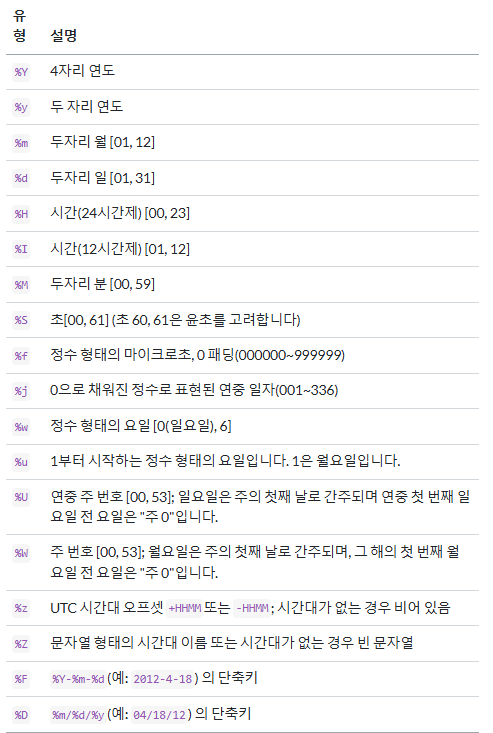

In [123]:
# 포맷 코드는 datetime.strptime으로 문자열을 날짜로 변환할 때 사용
value = "2011-01-03"

datetime.strptime(value, "%Y-%m-%d")

datetime.datetime(2011, 1, 3, 0, 0)

In [124]:
datestrs = ["7/6/2011", "8/6/2011"]

[datetime.strptime(x, "%m/%d/%Y") for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

#### datatime 객체는 여러 나라와 언어에서 사용하는 로케일에 적합한 포맷 옵션 제공
[로케일별 날짜 포맷]

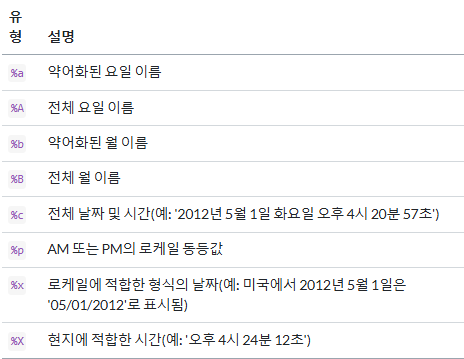

In [125]:
# pandas.to_datetime 메서드: 여러 종류의 날짜 표현 처리
datestrs = ["2011-07-06 00:00:00", "2011-08-06 00:00:00"]

pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None)

In [126]:
# pandas.to_datetime 메서드는 누락된 값으로 간주되어야 할 값도 처리
idx = pd.to_datetime(datestrs + [None])
print(idx)
print(idx[2]) # NaT: 판다스에서 누락된 타임스탬프 데이터

DatetimeIndex(['2011-07-06', '2011-08-06', 'NaT'], dtype='datetime64[ns]', freq=None)
NaT


In [127]:
pd.isna(idx)

array([False, False,  True])

## 11.2 시계열 기초

In [128]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
          datetime(2011, 1, 7), datetime(2011, 1, 8),
          datetime(2011, 1, 10), datetime(2011, 1, 12)]

ts = pd.Series(np.random.standard_normal(6), index=dates)
ts

,0
2011-01-02,1.645321
2011-01-05,-0.358196
2011-01-07,0.855377
2011-01-08,0.010793
2011-01-10,-1.116180
2011-01-12,0.637501


In [129]:
ts.index # DatetimeIndex에 datetime 객체 들어 있음

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [130]:
# 서로 다르게 색인된 시계열 객체 간의 산술 연산
ts + ts[::2] # 자동으로 날짜에 맞춰짐 ('[::2]': 매번 두 번째 항목 선택)

,0
2011-01-02,3.290642
2011-01-05,NaN
2011-01-07,1.710754
2011-01-08,NaN
2011-01-10,-2.232359
2011-01-12,NaN


In [131]:
ts.index.dtype

dtype('<M8[ns]')

#### DatetimeIndex 스칼라값은 판다스의 Timestamp 객체
- datetime 객체를 사용하는 곳 어디서든 pandas.Timestamp 사용 가능
- pandas.Timestamp: 나노초 정밀도의 데이터 저장 가능
- 빈도에 관한 정보가 있는 경우, 해당 정보도 저장.
- 시간대를 변환하는 방법과 다른 조작 방법도 저장.
- datetime: 마이크로초까지만 저장

In [132]:
# DatetimeIndex 스칼라값은 판다스의 Timestamp 객체
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

### 11.2.1 색인, 선택, 부분 선택
- 시계열은 레이블에 기반해 데이터 선택하고,, 인덱싱할 때 pandas.Series와 동일하게 작동

In [133]:
stamp = ts.index[2]
ts[stamp]

0.8553769128323967

In [134]:
# 해석할수 있는 날짜를 문자열로 넘기기 가능
ts["2011-01-10"]

-1.1161796127002916

In [135]:
# 긴 시계열에서는 연을 넘기가너 연, 월만 넘겨서 데이터의 일부 구간만 선택 가능
# pandas.date_range
longer_ts = pd.Series(np.random.standard_normal(1000),
                          index=pd.date_range("2000-01-01", periods=1000)) # 기준일(2000-01-01)로 부터 1000일
longer_ts

,0
2000-01-01,-0.313021
2000-01-02,1.533622
2000-01-03,-0.853213
2000-01-04,-1.636610
2000-01-05,0.323745
...,...
2002-09-22,1.678587
2002-09-23,-0.884242
2002-09-24,0.448210
2002-09-25,-2.330636


In [136]:
# 특정 연도의 데이터 선택하기
longer_ts["2001"]

,0
2001-01-01,-0.882377
2001-01-02,-0.501299
2001-01-03,0.881548
2001-01-04,0.145099
2001-01-05,-0.224683
...,...
2001-12-27,-0.606064
2001-12-28,0.751326
2001-12-29,1.359122
2001-12-30,0.634033


In [137]:
# 특정 년월 선택하기
longer_ts["2001-05"]

,0
2001-05-01,-0.290912
2001-05-02,0.866651
2001-05-03,-1.100879
2001-05-04,1.249572
2001-05-05,-1.147918
2001-05-06,1.114280
2001-05-07,-1.791129
2001-05-08,0.424162
2001-05-09,-1.792613
2001-05-10,-0.321427


#### 날짜로 데이터 슬라이싱
- 긴 시계열에서는 연을 넘기거나, 연,월만 넘겨서 데이터의일부 구간만 선택할 수 있음
- 대부분의 시계열 데이터는 연대순으로 정렬되기 때문에 범위를 지정하려면 시계열에 기재하지 않고 타임스탬프를 이용해서 Series를 나눔
- 데이터 슬라이싱을 하면 넘파이 배열을 나누는 것처럼 원본 시계열에 대한 뷰 생성 (데이터 복사 발생하지 않고 슬라이스에 대한 변경이 원본 데이터에도 반영)
- truncate 메서드: 두 날짜 사이에 속하는 Series 분할

In [138]:
# 날짜로 데이터 슬라이싱
ts[datetime(2011, 1, 7):]

,0
2011-01-07,0.855377
2011-01-08,0.010793
2011-01-10,-1.116180
2011-01-12,0.637501


In [139]:
# 데이터를 슬라이싱 하게 되면 데이터 복사가 발생하지 않고 원본 데이터에 반영됨
ts[datetime(2011, 1, 7): datetime(2011, 1, 10)]

,0
2011-01-07,0.855377
2011-01-08,0.010793
2011-01-10,-1.116180


In [140]:
ts

,0
2011-01-02,1.645321
2011-01-05,-0.358196
2011-01-07,0.855377
2011-01-08,0.010793
2011-01-10,-1.116180
2011-01-12,0.637501


In [141]:
# 날짜 문자열이나 datetime, Timestamp 넘기기
ts["2011-01-06": "2011-01-11"]

,0
2011-01-07,0.855377
2011-01-08,0.010793
2011-01-10,-1.116180


In [142]:
# truncate 메서드: 두 날짜 사이에 속하는 Series 분할
ts.truncate(after="2011-01-09")

,0
2011-01-02,1.645321
2011-01-05,-0.358196
2011-01-07,0.855377
2011-01-08,0.010793


In [143]:
# DataFrame에서 truncate 메서드
dates = pd.date_range("2000-01-01", periods=100, freq="W-WED")

long_df = pd.DataFrame(np.random.standard_normal((100, 4)),
                       index=dates,
                       columns=["Colorado", "Texas", "New York", "Ohio"])

long_df.loc["2001-05"]

,Colorado,Texas,New York,Ohio
2001-05-02,0.161854,-0.771290,-2.283189,0.004858
2001-05-09,-1.162055,1.513543,-1.054776,0.207482
2001-05-16,-0.357422,0.025254,-0.029700,-1.003418
2001-05-23,0.473514,1.378487,-0.743382,-0.025022
2001-05-30,-0.654732,-0.831083,-0.045343,0.385333


### 11.2.2 중복된 색인을 갖는 시계열


In [144]:
# 특정 타임스탬프에 여러 데이터가 몰려 있는 예
dates = pd.DatetimeIndex(["2000-01-01", "2000-01-02", "2000-01-02", "2000-01-02", "2000-01-03"])

dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

,0
2000-01-01,0
2000-01-02,1
2000-01-02,2
2000-01-02,3
2000-01-03,4


In [145]:
# is_unique 로 중복 확인
dup_ts.index.is_unique

False

In [146]:
dup_ts["2000-01-03"] # 중복 없음

4

In [147]:
dup_ts["2000-01-02"] # 중복 있음

,0
2000-01-02,1
2000-01-02,2
2000-01-02,3


In [148]:
# 유일하지 않은 타임스탬프 갖는 데이터 집계하기

# groupby에 level=0 (단일 단계 인덱싱)
grouped = dup_ts.groupby(level=0)

grouped.mean() # 그룹 평균

,0
2000-01-01,0.0
2000-01-02,2.0
2000-01-03,4.0


In [149]:
grouped.count() # 그룹 빈도수

,0
2000-01-01,1
2000-01-02,3
2000-01-03,1


## 11.3 날짜 범위, 빈도, 이동
- 판다스에서 일반적인 시계열은 불규칙적인 것으로 간주 (고정된 빈도를 갖지 않음)
- 그러나 상대적으로 고정된 빈도에서 작업이 필요한 경우가 있음 (일별, 월별 등)
- 판다스는 이를 위해 표준 시계열 빈도와 리샘플링을 위한 도구, 빈도 추론, 고정된 빈도의 날짜 범위를 위한 도구 제공
- resample 메서드: 시계열을 고정된 일간 빈도로 변환

In [150]:
# resample 메서드
resampler = ts.resample("D") # 일간 빈도
resampler

### 11.3.1 날짜 범위 생성하기
- pandas.date_range: 특정 빈도에 따라 지정된 길이만큼의 DatetimeIndex 생성.
- 기본적으로 일별 타임스탬프 생성
- pd.date_range("시작일", "종료일")
- pd.date_range(start="시작일", periods=생성기간)
- pd.date_range(end="종료일", periods=생성기간) > 생성기간은 숫자로 전달
- pandas.date_range는 기본적으로 시작 시간이나 종료 시간의 타임스탬프 보존 (존재 시)

In [151]:
# pd.date_range
index = pd.date_range("2012-04-01", "2012-06-01") # 시작 날짜, 종료 날짜
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [152]:
# 시작 날짜나 종료 날짜 하나만 넘길 경우는 생성할 기간의 숫자도 같이 전달
pd.date_range(start="2012-04-01", periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [153]:
pd.date_range(end="2012-06-01", periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [154]:
# 날짜 색인에 각 월의 마지막 영업일 포함하기
pd.date_range("2000-01-01", "2000-12-01", freq="BME") # 'BM' is deprecated and will be removed

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BME')

### 기본 시계열 빈도

|별명|오프셋 타입 |	설명|
|------|---|---|
|D	|Day	|달력 |매일|
|B	|BusinessDay	|비즈니스 데일리|
|h (과거 H)	|Hour	|시간당|
|T또는min	|Minute	|1분에 한 번|
|S	|Second	|1초에 한 번|
|L또는ms	|Milli	|밀리초(1초의 1/1,000)|
|U	|Micro	|마이크로초(1초의 1/1,000,000)|
|ME (과거 M)	|MonthEnd	|매월 마지막 달력 날짜|
|BME (과거 BM)	|BusinessMonthEnd	|매월 마지막 영업일(주중)|
|MS	|MonthBegin	|매월 첫 번째 달력 날짜|
|BMS	|BusinessMonthBegin	|매월 첫 번째 평일|
|W-MON, W-TUE, ...	|Week	|매주 지정된 요일(월, 화, 수, 목, 금, 토, 일)|
|WOM-1MON, WOM-2MON, ...	|WeekOfMonth	|매월 1, 2, 3 또는 4주차에 주간 날짜를 생성합니다(예: WOM-3FRI매월 3번째 금요일)|
|Q-JAN, Q-FEB, ...	|QuarterEnd	|각 달의 마지막 달력일에 고정된 분기 날짜(지정된 달로 끝나는 연도(1월, 2월, 3월, 4월, 5월, 6월, 7월, 8월, 9월, 10월, 11월 또는 12월))|
|BQ-JAN, BQ-FEB, ...	|BusinessQuarterEnd	|지정된 달로 끝나는 연도의 경우 각 달의 마지막 평일에 고정된 분기 날짜|
|QS-JAN, QS-FEB, ...	|QuarterBegin	|지정된 달로 끝나는 연도의 경우 각 달의 첫 번째 달력일에 고정된 분기 날짜|
|BQS-JAN, BQS-FEB, ...	|BusinessQuarterBegin	|각 달의 첫 번째 평일에 고정된 분기 날짜(지정된 달로 끝나는 연도)|
|A-JAN, A-FEB, ...	|YearEnd	|지정된 월의 마지막 달력일에 고정된 연간 날짜(1월, 2월, 3월, 4월, 5월, 6월, 7월, 8월, 9월, 10월, 11월 또는 12월)|
|BA-JAN, BA-FEB, ...|	BusinessYearEnd|	지정된 월의 마지막 평일에 고정된 연간 날짜|
|AS-JAN, AS-FEB, ...|	YearBegin|	지정된 달의 첫째 날을 기준으로 연간 날짜가 고정됨|
|BAS-JAN, BAS-FEB, ...|	BusinessYearBegin|	지정된 월의 첫 번째 평일에 고정된 연간 날짜|

In [155]:
# pandas.date_range는 기본적으로 시작 시간이나 종료 시간의 타임스탬프 보존 (존재 시)
pd.date_range("2012-05-02 12:56:31", periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [156]:
# 자정에 맞춰 타임스탬프 정규화 원할 경우 normalize 옵션 사용
pd.date_range("2012-05-02 12:56:31", periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### 11.3.2 빈도와 날짜 오프셋
- 판다스에서 빈도는 기본 빈도와 배수의 조합으로 이루어짐
- 기본 빈도는 보통 "M" (월별), "H" (시간별) 처럼 짧은 문자열로 참조
- 각 기본 빈도에는 날짜 오프셋이라고 부르는 객체 사용 (ex. 시간별 빈도는 Hour 클래스로 표현)
- 기본 빈도 앞에 정수를 두면 해당 빈도의 곱 생성 (ex. freq="4H")
- 여러 오프셋을 덧셈으로 합치기 가능 (ex.Hour(2) + Minute(30))
- 빈도 문자열을 여러 오프셋으로 줘도 됨 (ex. freq="1h30min")

In [157]:
from pandas.tseries.offsets import Hour, Minute

hour = Hour()
hour

<Hour>

In [158]:
# 오프셋 곱은 정수를 넘겨서 구함
four_hours = Hour(4)
four_hours

<4 * Hours>

In [159]:
# 기본 빈도 앞에 정수를 두면 해당 빈도의 곱 생성
pd.date_range("2000-01-01", "2000-01-03 23:59", freq="4h") # 4시간 간격 # H 사라질 예정

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4h')

In [160]:
# 여러 오프셋을 덧셈으로 합칠 수 있음
Hour(2) + Minute(30)

<150 * Minutes>

In [161]:
# 여러 오프셋을 빈도 문자열을 넘겨도 됨
pd.date_range("2000-01-01", periods=10, freq="1h30min")

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90min')

#### 월별 주차
- WOM 클래스는 월별 주차
- 월별 주차를 사용하면 매월 특정 주의 특정 요일의 날짜를 얻을 수 있음.
- 예. 셋째 주 금요일: freq="WOM-3FRI"

In [162]:
# 월별 주차: WOM

# 특정 기간의 매월 셋째 주 금요일 날짜 구하기
monthly_dates = pd.date_range("2012-01-01", "2012-09-01", freq="WOM-3FRI")
monthly_dates

DatetimeIndex(['2012-01-20', '2012-02-17', '2012-03-16', '2012-04-20',
               '2012-05-18', '2012-06-15', '2012-07-20', '2012-08-17'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

### 11.3.3 데이터 시프트
- 시프트(shift): 데이터를 시간 축에서 앞이나 뒤로 이동하는 것
- Series와 DataFrame은 shfit 메서드를 통해 색인은 변경하지 않고 데이터를 앞이나 뒤로 이동하는 느슨한 시프트 수행
- shift(양수 또는 음수): 해당 수만큼 뒤로 밀거나, 앞으로 당김 > 시계열의 시작이나 끝에 결측치 발생하게 됨
- shfit는 일반적으로 하나의 시계열이나 DataFrame의 열로 표현할 수 있는 여러 시계열에서의 퍼센트 변화율 계산 시 흔히 사용
- 시프트는 색인을 바꾸지 않으므로 어떤 데이터는 버려지기도 함 > 빈도를 알고 있을 경우 shift에 빈도를 넘겨 타임스탬프 확장 가능

In [163]:
ts = pd.Series(np.random.standard_normal(4),
               index=pd.date_range("2000-01-01", periods=4, freq="M"))

ts

<ipython-input-163-ac79f782d4fc>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index=pd.date_range("2000-01-01", periods=4, freq="M"))


,0
2000-01-31,0.073889
2000-02-29,0.582207
2000-03-31,-0.221405
2000-04-30,0.165796


In [164]:
ts.shift(2) # 2일 뒤로 이동

,0
2000-01-31,NaN
2000-02-29,NaN
2000-03-31,0.073889
2000-04-30,0.582207


In [165]:
ts.shift(-2) # 2일 앞으로 이동

,0
2000-01-31,-0.221405
2000-02-29,0.165796
2000-03-31,NaN
2000-04-30,NaN


In [166]:
# shift는 일반적으로 퍼센트 변화율 계산할 때 흔히 사용1
ts / ts.shift(1) - 1

,0
2000-01-31,NaN
2000-02-29,6.879510
2000-03-31,-1.380285
2000-04-30,-1.748838


In [167]:
# 시프트는 색인을 바꾸지 않으므로 어떤 데이터는 버려지기도 함
# 빈도 알고 있을 경우 shfit 에 빈도 넘겨 타임스탬프 확장
ts.shift(2, freq="ME") # 'M' is deprecated and will be removed

,0
2000-03-31,0.073889
2000-04-30,0.582207
2000-05-31,-0.221405
2000-06-30,0.165796


In [168]:
 # 다른 빈도 넘겨서 데이터 밀거나 당기기 가능
 ts.shift(3, freq="D")

,0
2000-02-03,0.073889
2000-03-03,0.582207
2000-04-03,-0.221405
2000-05-03,0.165796


In [169]:
ts.shift(1, freq="90min") # 'T' is deprecated and will be removed

,0
2000-01-31 01:30:00,0.073889
2000-02-29 01:30:00,0.582207
2000-03-31 01:30:00,-0.221405
2000-04-30 01:30:00,0.165796


#### 오프셋만큼 날짜 시프트하기
- 판다스의 날짜 오프셋은 datetime 이나 Timestamp 객체에서도 사용 가능
- 앵커드 오프셋은 rollforward나 rollback 메서드를 사용해서 명시적으로 각각 날짜를 밀거나 뒤로 당기기 가능

In [170]:
from pandas.tseries.offsets import Day, MonthEnd

In [171]:
now = datetime(2011, 11, 17)

now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [172]:
# MonthEnd: 빈도 규칙의 다음 날짜로 롤 포워드
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [173]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [174]:
# 앵커드 오프셋은 rollforward나 rollback 메서드를 사용해서 밀거나 뒤로 당기기 가능
offset = MonthEnd()

print("뒤로 밀기:", offset.rollforward(now))
print("앞으로 당기기:", offset.rollback(now))

뒤로 밀기: 2011-11-30 00:00:00
앞으로 당기기: 2011-10-31 00:00:00


In [175]:
# groupby와 날짜 오프셋 같이 사용
ts = pd.Series(np.random.standard_normal(20),
               index=pd.date_range("2000-01-15", periods=20, freq="4D")) # 4일 간격

ts

,0
2000-01-15,-1.141255
2000-01-19,-0.008801
2000-01-23,0.725643
2000-01-27,1.053543
2000-01-31,-0.992281
2000-02-04,0.770380
2000-02-08,-1.425186
2000-02-12,0.196730
2000-02-16,0.754157
2000-02-20,1.105889


In [176]:
ts.groupby(MonthEnd().rollforward).mean()

,0
2000-01-31,-0.072630
2000-02-29,-0.246402
2000-03-31,-0.085293


In [177]:
# resample은 위보다 더 간단
ts.resample("ME").mean()

,0
2000-01-31,-0.072630
2000-02-29,-0.246402
2000-03-31,-0.085293


## 11.4 시간대 다루기
- 시계열을 다루는 대부분의 사용자는 국제 표준시인 UTC(Coordinated Universal Time) 선택
- 파이썬은 전 세계 시간대를 모아둔 올슨 데이터베이스를 담고 있는 서드파티 라이브러리인 pytz에서 시간대 정보 얻음 (pip 또는 conda로 설치)
- 판다스는 pytz 에 의존성이 높으므로 따로 설치할 필요 없음

In [178]:
import pytz

In [179]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [180]:
# pytz에서 시간대 객체 얻기
tz = pytz.timezone("America/New_York")
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

### 11.4.1 시간대 지역화와 변환

In [181]:
dates = pd.date_range("2012-03-09 09:30", periods=6)

ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)
ts

,0
2012-03-09 09:30:00,0.015137
2012-03-10 09:30:00,0.469390
2012-03-11 09:30:00,0.171008
2012-03-12 09:30:00,-1.955559
2012-03-13 09:30:00,-0.744616
2012-03-14 09:30:00,0.107473


In [182]:
# 색인의 tz 필드 :None
print(ts.index.tz)

None


In [183]:
# 시간대 지정해서 날짜 범위 생성
pd.date_range("2012-03-09 09:30", periods=10, tz="UTC")

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [184]:
# tz_localize 메서드: 특정 시간대에 맞춰 재해석된 지역화 시간으로의 변환
ts_utc = ts.tz_localize("UTC")
ts_utc

,0
2012-03-09 09:30:00+00:00,0.015137
2012-03-10 09:30:00+00:00,0.469390
2012-03-11 09:30:00+00:00,0.171008
2012-03-12 09:30:00+00:00,-1.955559
2012-03-13 09:30:00+00:00,-0.744616
2012-03-14 09:30:00+00:00,0.107473


In [185]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

#### DST: 일광 절약 시간제(Daylight saving time).
- 서머타임(Summer time)이라고도 불리며, 하절기에 표준 시간보다 1시간 앞당겨 사용하는 시간
- 미국에서는 1900년부터 DST 시간이 수차례 변경됨.
- 타임스탬프를 특정 시간대로 지역화하면 DST에 의한 모호하거나 존재하지 않는 시간을 체크 가능

In [186]:
# tz_convert: 다른 시간대로 변환
# 시계열이 특정 시간대로 지역화된 후 변환 가능
ts_utc.tz_convert("America/New_York") # America/New_York 시간대의 DST

,0
2012-03-09 04:30:00-05:00,0.015137
2012-03-10 04:30:00-05:00,0.469390
2012-03-11 05:30:00-04:00,0.171008
2012-03-12 05:30:00-04:00,-1.955559
2012-03-13 05:30:00-04:00,-0.744616
2012-03-14 05:30:00-04:00,0.107473


In [187]:
# America/New_York 시간대의 DST를 동부 표준시(ET)로 맞추기
ts_eastern = ts.tz_localize("America/New_York")

# UTC 시간으로 변환하기
ts_eastern.tz_convert("UTC")

,0
2012-03-09 14:30:00+00:00,0.015137
2012-03-10 14:30:00+00:00,0.469390
2012-03-11 13:30:00+00:00,0.171008
2012-03-12 13:30:00+00:00,-1.955559
2012-03-13 13:30:00+00:00,-0.744616
2012-03-14 13:30:00+00:00,0.107473


In [188]:
# America/New_York 시간대의 DST를 베를린 시간으로 변환하기
ts_eastern.tz_convert("Europe/Berlin")

,0
2012-03-09 15:30:00+01:00,0.015137
2012-03-10 15:30:00+01:00,0.469390
2012-03-11 14:30:00+01:00,0.171008
2012-03-12 14:30:00+01:00,-1.955559
2012-03-13 14:30:00+01:00,-0.744616
2012-03-14 14:30:00+01:00,0.107473


In [189]:
# tz_localize와 tz_convert는 모두 DatetimeIndex의 인스턴스 메서드
ts.index.tz_localize("Asia/Shanghai")

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq=None)

### 11.4.2 시간대를 고려해서 Timestamp 객체 다루기
- 개별 Timestamp 객체도 시간대를 고려한 형태로 변환 가능
- Timestamp 객체 생성 시 시간대를 직접 넘길 수 있음
- 시간대를 고려한 Timestamp 객체는 내부적으로 UTC 타임스탬프 값을 유닉스 시간(1970년 1월 1일)에서부터 현재까지의 나노초로 저장 > 이 UTC 값은 시간대 변환 과정에서 변하지 않고 유지
- 판다스의 DateOffset 객체 이용하여 시간 연산 수행 시 가능하다면 DST 고려하며 수행
- 서로 다른 시간대를 갖는 두 시계열이 하나로 합쳐지면 UTC가 됨
- 타임스탬프는 내부적으로 UTC로 저장 (추가적인 변환 불필요
- 시간대를 고려하지 않은 데이터와 시간대를 고려한 데이터 간의 연산은 미지원 (연산 실행 시 예외 발생)

In [190]:
stamp = pd.Timestamp("2011-03-12 04:00")
stamp_utc = stamp.tz_localize("utc") # UTC 시간으로 변환
stamp_utc.tz_convert("America/New_York") # America/New_York 지역 시간대로 변환

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [191]:
# 시간대 직접 넘기기
stamp_moscow = pd.Timestamp("2011-03-12 04:00", tz="Europe/Moscow")
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [192]:
print(stamp_utc.value)
print(stamp_utc.tz_convert("America/New_York").value)

1299902400000000000
1299902400000000000


In [193]:
# DST 전환 직전의 타임스탬프

# DST 시행 30분 전 Timestamp
stamp = pd.Timestamp("2012-03-11 01:30", tz="US/Eastern")
print(stamp)
print(stamp + Hour())

print()

# DST 시행 90분 전의 Timestamp 생성
stamp = pd.Timestamp("2012-11-04 00:30", tz="US/Eastern")
print(stamp)
print(stamp + 2 * Hour())

2012-03-11 01:30:00-05:00
2012-03-11 03:30:00-04:00

2012-11-04 00:30:00-04:00
2012-11-04 01:30:00-05:00


In [194]:
# 서로 다른 시간대를 갖는 두 시계열이 하나로 합쳐지면 UTC가 됨
# 타임스탬프는 내부적으로 UTC로 저장 (추가적인 변환 불필요)
dates = pd.date_range("2012-03-07 09:30", periods=10, freq="B")

ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)
ts

,0
2012-03-07 09:30:00,0.159494
2012-03-08 09:30:00,0.636171
2012-03-09 09:30:00,0.435657
2012-03-12 09:30:00,-0.941393
2012-03-13 09:30:00,-0.116997
2012-03-14 09:30:00,-1.701608
2012-03-15 09:30:00,-0.130688
2012-03-16 09:30:00,-0.229079
2012-03-19 09:30:00,-1.422687
2012-03-20 09:30:00,-0.436089


In [195]:
ts1 = ts[:7].tz_localize("Europe/London")
ts2 = ts1[2:].tz_convert("Europe/Moscow")

result = ts1 + ts2
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

## 11.5 기간과 기간 연산
- 특정 기간(며칠, 몇 개월, 몇 분기, 몇 해 등)은 pandas.Period 클래스로 표현 가능
- 클래스 생성 시 문자열이나 정수, 또는 빈도 필요
- 정수를 더하거나 빼는 방식으로 기간 이동 가능
- 두 기간의 빈도가 동일할 경우 두 기간의 차는 둘 사이의 간격이 됨
- period_range로 기간 범위 생성
- PeriodIndex 클래스: 순차적인 기간 저장하며 모든 판다스 자료구조의 축 색인처럼 이용 됨

In [196]:
p = pd.Period("2011", freq="Y-DEC") # 'A-DEC' is deprecated and will be removed
p # Y-DEC: 2011년 1월 1일 - 12월 31일

Period('2011', 'Y-DEC')

In [197]:
# 기간 이동 하기 (정수 더하기, 빼기)
print("기준 년: ", p)
print("5년 후: ", p + 5)
print("2년 전: ", p - 2)

기준 년:  2011
5년 후:  2016
2년 전:  2009


In [198]:
# 두 기간의 빈도 동일할 경우
pd.Period("2014", freq="Y-DEC") - p

<3 * YearEnds: month=12>

In [199]:
# period_range : 기간 범위 생성
periods = pd.period_range("2000-01-01", "2000-06-30", freq="M") # Month(월) 간격으로 생성

periods

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]')

In [200]:
# PeriodIndex 클래스: 순차적인 기간 저장
pd.Series(np.random.standard_normal(6), index=periods)

,0
2000-01,0.769148
2000-02,1.142981
2000-03,-1.526679
2000-04,-0.750954
2000-05,-0.313074
2000-06,-0.360347


In [201]:
# 문자열 배열 이용하여 PeriodIndex 클래스 생성 가능
values = ["2001Q3", "2002Q2", "2003Q1"]

index = pd.PeriodIndex(values, freq="Q-DEC")
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]')

### 11.5.1 Period의 빈도 변환
- Period와 PeriodIndex 객체는 asfreq 메서드를 사용해 다른 빈도로 변환 가능

In [202]:
# 새해 첫날부터 시작하는 연간 빈도
p = pd.Period("2011", freq="Y-DEC")
print("연간 빈도: ", p)

# 연간 빈도를 월간 빈도로 변환
print("월간 빈도 시작: ", p.asfreq("M", how="start"))
print("월간 빈도 종료: ", p.asfreq("M", how="end"))

print("월간 빈도: ", p.asfreq("M"))

연간 빈도:  2011
월간 빈도 시작:  2011-01
월간 빈도 종료:  2011-12
월간 빈도:  2011-12


In [203]:
# 회계 연도, 학기 등 처럼 마감이 12월이 아닌 경우
account = pd.Period("2011", freq="Y-JUN")
print("회계연도: ", account)

print("회계연도 시작: ", account.asfreq("M", how="start"))
print("회계연도 종료: ", account.asfreq("M", how="end"))

회계연도:  2011
회계연도 시작:  2010-07
회계연도 종료:  2011-06


In [204]:
# 빈도가 상위 단계에서 하위 단계로 변환되는 경우
# 판다스는 상위 기간이 어디에 속했는지에 따라 하위 기간 결정
account = pd.Period("Aug-2011", "M")

account.asfreq("Y-JUN")

Period('2012', 'Y-JUN')

In [205]:
# PeriodIndex 객체나 TimeSeries 변환
periods = pd.period_range("2006", "2009", freq="Y-DEC")

ts = pd.Series(np.random.standard_normal(len(periods)), index=periods)
ts

,0
2006,-0.288266
2007,0.536288
2008,0.974253
2009,-0.486786


In [206]:
ts.asfreq("M", how="start")

,0
2006-01,-0.288266
2007-01,0.536288
2008-01,0.974253
2009-01,-0.486786


In [207]:
# 매년 마지막 영업일로 변환
ts.asfreq("B", how="end")

<ipython-input-207-a1029e027a5e>:2: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ts.asfreq("B", how="end")


,0
2006-12-29,-0.288266
2007-12-31,0.536288
2008-12-31,0.974253
2009-12-31,-0.486786


### 11.5.2 분기 빈도
- 분기 빈도: Q-JAN ~ Q-DEC
- 분기 데이터는 재정, 금융 등의 분야에서 표준으로 사용


In [208]:
# 회계연도 마감이 1월인 경우
p = pd.Period("2012Q4", freq="Q-JAN")
print("회계연도:", p)

# 회계연도 시작일, 종료일
p_start = p.asfreq("D", how="start")
p_end = p.asfreq("D", how="end")

print("회계연도 시작일:", p_start)
print("회계연도 종료일:", p_end)
print("타입:", type(p_end))

회계연도: 2012Q4
회계연도 시작일: 2011-11-01
회계연도 종료일: 2012-01-31
타입: <class 'pandas._libs.tslibs.period.Period'>


In [212]:
# 분기 영업 마감일의 오후 4시
p4pm = (p.asfreq("B", how="end") - 1).asfreq("T", how="start") + 16 * 60

p4pm

<ipython-input-212-efb3e462b78b>:2: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  p4pm = (p.asfreq("B", how="end") - 1).asfreq("T", how="start") + 16 * 60
<ipython-input-212-efb3e462b78b>:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  p4pm = (p.asfreq("B", how="end") - 1).asfreq("T", how="start") + 16 * 60


Period('2012-01-30 16:00', 'min')

In [213]:
# to_timestamp 메서드는 기본적으로 해당 기간의 시작 Timestamp 반환
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [214]:
# 분기 범위 생성
periods = pd.period_range("2011Q3", "2012Q4", freq="Q-JAN")
ts = pd.Series(np.arange(len(periods)), index=periods)

ts

,0
2011Q3,0
2011Q4,1
2012Q1,2
2012Q2,3
2012Q3,4
2012Q4,5


In [216]:
new_periods = (periods.asfreq("B", "end") - 1).asfreq("h", "start") + 16
ts.index = new_periods.to_timestamp()
ts

<ipython-input-216-4637e3962d48>:1: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  new_periods = (periods.asfreq("B", "end") - 1).asfreq("h", "start") + 16


,0
2010-10-28 16:00:00,0
2011-01-28 16:00:00,1
2011-04-28 16:00:00,2
2011-07-28 16:00:00,3
2011-10-28 16:00:00,4
2012-01-30 16:00:00,5


### 11.5.3 타임스탬프와 기간 서로 변환하기
- to_period 메서드: 타임스탬프로 색인된 Series와 DataFrame 객체를 period로 변환 가능
- to_timestamp 메서드: 기간을 타임스탬프로 변환 (DatetimeIndex 반환)

In [218]:
dates = pd.date_range("2000-01-01", periods=3, freq="ME")
ts = pd.Series(np.random.standard_normal(3), index=dates)
ts

,0
2000-01-31,-0.323127
2000-02-29,-1.102007
2000-03-31,-1.173904


In [219]:
pts = ts.to_period()
pts

,0
2000-01,-0.323127
2000-02,-1.102007
2000-03,-1.173904


In [221]:
# 새로운 PeriodIndex 빈도는 기본적으로 타임스탬프 값을 통해 추론되나
# 지원되는 빈도를 직접 지정 가능 (결과에 중복 기간 나오더라도 문제 없음)
dates = pd.date_range("2000-01-29", periods=6)
ts2 = pd.Series(np.random.standard_normal(6), index=dates)
ts2

,0
2000-01-29,1.763263
2000-01-30,0.435868
2000-01-31,0.607178
2000-02-01,0.243363
2000-02-02,-0.952241
2000-02-03,1.222955


In [223]:
ts2.to_period("M")

,0
2000-01,1.763263
2000-01,0.435868
2000-01,0.607178
2000-02,0.243363
2000-02,-0.952241
2000-02,1.222955


In [224]:
# to_timestamp 메서드
pts = ts2.to_period()
pts

,0
2000-01,-0.323127
2000-02,-1.102007
2000-03,-1.173904


In [225]:
pts.to_timestamp(how='end')

,0
2000-01-31 23:59:59.999999999,-0.323127
2000-02-29 23:59:59.999999999,-1.102007
2000-03-31 23:59:59.999999999,-1.173904


### 11.5.4 배열로 PeriodIndex 생성하기

In [226]:
# 거시경제학 데이터셋 로드
data = pd.read_csv(path_ex + 'macrodata.csv')
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [227]:
data["year"]

,year
0,1959
1,1959
2,1959
3,1959
4,1960
...,...
198,2008
199,2008
200,2009
201,2009


In [228]:
data["quarter"]

,quarter
0,1
1,2
2,3
3,4
4,1
...,...
198,3
199,4
200,1
201,2


In [229]:
# "year", "quarter" 배열을 색인으로 만들기
# 위 배열을 PeriodIndex에 빈돗값과 함께 전달
index = pd.PeriodIndex(year=data["year"], quarter=data["quarter"],
                       freq="Q-DEC")
index

<ipython-input-229-ed6023968112>:3: FutureWarning: Constructing PeriodIndex from fields is deprecated. Use PeriodIndex.from_fields instead.
  index = pd.PeriodIndex(year=data["year"], quarter=data["quarter"],


PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203)

In [230]:
data["infl"]

,infl
0,0.00
1,2.34
2,2.74
3,0.27
4,2.31
...,...
198,-3.16
199,-8.79
200,0.94
201,3.37


## 11.6 리샘플링과 빈도 변환
- 리샘플링: 시계열의 빈도를 변환하는 과정
- 다운샘플링: 높은 빈도의 데이터를 낮은 빈도로 집계
- 업샘플링: 낮은 빈도의 데이터를 높은 빈도로 집계
- 그 외의 리샘플링 (ex. W-WED > W-FRI)
- 판다스 객체는 resample 메서드를 가지며 빈도 변환과 관련된 모든 작업에서 유용하게 사용
- resample을 호출해서 데이터를 그룹 짓고 집계 함수 적용(groupby와 유사)

[resample 메서드 인수]

|인수|설명|
--|--
|rule|원하는 리샘플링 빈도를 지정하는 문자열. DateOffset, timedelta|
|axis|리샘플링을 수행할 축. 기본값: axis="index"|
|closed|다운샘플링 시 각 간격의 어느 쪽 포함할지 가리킴 (right, left 기본값은 right)|
|label|다운샘플링 시 집계된 결과의 레이블 결정 (right, left, 기본값은 right)|
|limit|보간법을 사용할 때 보간을 적용할 최대 기간|
|kind|기간별 혹은 타임스탬프 별로 집계할 것인지 구분 (기본값은 시계열 색인의 종류와 같음)|
|convention|기간을 리샘플링할 때 하위 빈도 기간에서 상위 빈도로 변환 시의 방식(start 혹은 end, 기본값은 end)|
|origin|리샘플링의 각 구간 가장자리를 결정하는 '기준'이 되는 타임스탬프 (epoch, start, start_day, end, end_day 중 하나)|
|offset|origin 추가될 timedelta 오프셋. 기본값은 None|


In [231]:
dates = pd.date_range("2000-01-01", periods=100)
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)
ts

,0
2000-01-01,0.412819
2000-01-02,0.171259
2000-01-03,-0.436372
2000-01-04,0.266176
2000-01-05,0.217017
...,...
2000-04-05,-0.235615
2000-04-06,-0.268933
2000-04-07,0.656208
2000-04-08,1.198518


In [232]:
ts.resample("M").mean()

<ipython-input-232-c1466a999164>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts.resample("M").mean()


,0
2000-01-31,0.031682
2000-02-29,0.145295
2000-03-31,-0.135604
2000-04-30,-0.279575


In [233]:
ts.resample("M", kind="period").mean()

<ipython-input-233-7b45bb9ae333>:1: FutureWarning: The 'kind' keyword in Series.resample is deprecated and will be removed in a future version. Explicitly cast the index to the desired type instead
  ts.resample("M", kind="period").mean()
<ipython-input-233-7b45bb9ae333>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts.resample("M", kind="period").mean()


,0
2000-01,0.031682
2000-02,0.145295
2000-03,-0.135604
2000-04,-0.279575


### 11.6.1 다운샘플링
- 시계열 데이터를 규칙적이고 낮은 빈도로 집계
- 집계할 데이터는 고정 빈도를 가질 필요 없으며 잘라낸 시계열 조각의 크기를 원하는 빈도로 정의
- 각 간격의 한쪽은 열려 있어야 함 (하나의 간격에서 양 끝 중 한쪽만 포함)

resample을 사용해서 데이터를 다운샘플링 시 고려사항
- 각 간격의 양 끝 중에서 어느 쪽을 닫아둘지(closed)
- 집계하려는 구간의 레이블을 간격의 시작으로 할지 끝으로 할지

to_offset 메서드: 반환된 결과의 색인을 특정 크기만큼 이동

In [235]:
# 1분 단위 데이터 생성
dates = pd.date_range("2000-01-01", periods=12, freq="min")
ts = pd.Series(np.arange(len(dates)), index=dates)
ts

,0
2000-01-01 00:00:00,0
2000-01-01 00:01:00,1
2000-01-01 00:02:00,2
2000-01-01 00:03:00,3
2000-01-01 00:04:00,4
2000-01-01 00:05:00,5
2000-01-01 00:06:00,6
2000-01-01 00:07:00,7
2000-01-01 00:08:00,8
2000-01-01 00:09:00,9


In [236]:
# ts 데이터를 5분 단위로 묶어 각 그룹의 합 집계
ts.resample("5min").sum() # 기본적으로 시작값을 그룹의 왼쪽에 포함시키므로 00:00-00:05 (00:05 제외)

,0
2000-01-01 00:00:00,10
2000-01-01 00:05:00,35
2000-01-01 00:10:00,21


In [237]:
# closed="right" 넘기면 시작값을 그룹 오른쪽에 포함시킴
ts.resample("5min", closed="right").sum()

,0
1999-12-31 23:55:00,0
2000-01-01 00:00:00,15
2000-01-01 00:05:00,40
2000-01-01 00:10:00,11


In [238]:
# label='right'를 넘겨서 각 그룹의 오른쪽 값 레이블로 사용 가능 (기본값은 왼쪽)
ts.resample("5min", closed="right", label="right").sum()

,0
2000-01-01 00:00:00,0
2000-01-01 00:05:00,15
2000-01-01 00:10:00,40
2000-01-01 00:15:00,11


In [240]:
# to_offset 메서드
from pandas.tseries.frequencies import to_offset

result =ts.resample("5min", closed="right", label="right").sum()

# 그룹의 오른쪽 끝에서 1초를 빼서 타임스탬프가 참조하는 간격 보여주기
result.index = result.index + to_offset("-1s")
result

,0
1999-12-31 23:59:59,0
2000-01-01 00:04:59,15
2000-01-01 00:09:59,40
2000-01-01 00:14:59,11


#### OHLC 리샘플링
- OHLC
- open: 시가
- high: 고가
- low: 저가
- close : 종가
- ohlc 집계 함수를 사용하면 OHLC 값을 한 열에 담은 DataFrame 반환

In [241]:
ts = pd.Series(np.random.permutation(np.arange(len(dates))), index=dates)

ts.resample("5min").ohlc()

,open,high,low,close
2000-01-01 00:00:00,5,9,0,9
2000-01-01 00:05:00,10,11,2,11
2000-01-01 00:10:00,6,6,4,4


### 11.6.2 업샘플링과 보간

In [243]:
frame = pd.DataFrame(np.random.standard_normal((2, 4)),
                     index=pd.date_range("2000-01-01", periods=2, freq="W-WED"),
                     columns=["Colorado", "Texas", "New York", "Ohio"])

frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.509013,0.284463,0.343411,-1.852986
2000-01-12,0.500385,1.283882,0.107447,-1.035291


In [244]:
# 집계 함수 사용 시 그룹당 하나의 값이 들어가고 그 사이에는 결측치 들어감

# asfreq 메서드 이용해 높은 빈도로 리샘플링
df_daily = frame.resample("D").asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-0.509013,0.284463,0.343411,-1.852986
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.500385,1.283882,0.107447,-1.035291


In [245]:
# 리샘플링에서도 fillna, reindex 의 보간 메서드 사용 가능
frame.resample("D").ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-0.509013,0.284463,0.343411,-1.852986
2000-01-06,-0.509013,0.284463,0.343411,-1.852986
2000-01-07,-0.509013,0.284463,0.343411,-1.852986
2000-01-08,-0.509013,0.284463,0.343411,-1.852986
2000-01-09,-0.509013,0.284463,0.343411,-1.852986
2000-01-10,-0.509013,0.284463,0.343411,-1.852986
2000-01-11,-0.509013,0.284463,0.343411,-1.852986
2000-01-12,0.500385,1.283882,0.107447,-1.035291


In [246]:
# limit 옵션으로 특정 기간만 채우도록 설정 가능
frame.resample("D").ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-0.509013,0.284463,0.343411,-1.852986
2000-01-06,-0.509013,0.284463,0.343411,-1.852986
2000-01-07,-0.509013,0.284463,0.343411,-1.852986
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.500385,1.283882,0.107447,-1.035291


In [247]:
# 새로운 날짜 색인은 이전 색인과 일치할 필요 없음
frame.resample("W-THU").ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,-0.509013,0.284463,0.343411,-1.852986
2000-01-13,0.500385,1.283882,0.107447,-1.035291


### 11.6.3 기간 리샘플링
- 다운샘플링의 경우 대상 빈도는 반드시 원본 빈도의 하위기간이어야 함
- 업샘플링의 경우 대상 빈도는 반드시 원본 빈도의 상위 기간이어야 함
- 위 조건을 만족하지 않을 경우 예외 발생

In [256]:
frame = pd.DataFrame(np.random.standard_normal((24, 4)),
                     index=pd.period_range("1-2000", "12-2001", freq="M"),
                     columns=["Colorado", "Texas", "New York", "Ohio"])

frame.head()

,Colorado,Texas,New York,Ohio
2000-01,-0.393603,0.078729,0.210591,0.440374
2000-02,0.428406,0.297783,-1.431292,-1.309616
2000-03,-0.131484,1.511923,1.286267,0.033231
2000-04,1.035773,-0.517478,1.290099,0.996087
2000-05,1.080521,0.037207,0.660619,2.642718


In [257]:
annual_frame = frame.resample("Y-DEC").mean()
annual_frame

<ipython-input-257-73b01403df90>:1: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  annual_frame = frame.resample("Y-DEC").mean()


,Colorado,Texas,New York,Ohio
2000,0.544523,0.280083,0.122883,0.319263
2001,0.028815,0.128694,-0.029223,0.093825


In [258]:
# Q-DEC: 12월을 연도의 마감으로 하는 분기 주기
annual_frame.resample("Q-DEC").ffill()

<ipython-input-258-30d06ce11f6c>:2: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  annual_frame.resample("Q-DEC").ffill()


,Colorado,Texas,New York,Ohio
2000Q1,0.544523,0.280083,0.122883,0.319263
2000Q2,0.544523,0.280083,0.122883,0.319263
2000Q3,0.544523,0.280083,0.122883,0.319263
2000Q4,0.544523,0.280083,0.122883,0.319263
2001Q1,0.028815,0.128694,-0.029223,0.093825
2001Q2,0.028815,0.128694,-0.029223,0.093825
2001Q3,0.028815,0.128694,-0.029223,0.093825
2001Q4,0.028815,0.128694,-0.029223,0.093825


In [259]:
# convention 인수의 기본값은 "start"
annual_frame.resample("Q-DEC", convention="end").asfreq()

<ipython-input-259-9bdfb3c9b385>:2: FutureWarning: The 'convention' keyword in DataFrame.resample is deprecated and will be removed in a future version. Explicitly cast PeriodIndex to DatetimeIndex before resampling instead.
  annual_frame.resample("Q-DEC", convention="end").asfreq()
<ipython-input-259-9bdfb3c9b385>:2: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  annual_frame.resample("Q-DEC", convention="end").asfreq()


,Colorado,Texas,New York,Ohio
2000Q4,0.544523,0.280083,0.122883,0.319263
2001Q1,NaN,NaN,NaN,NaN
2001Q2,NaN,NaN,NaN,NaN
2001Q3,NaN,NaN,NaN,NaN
2001Q4,0.028815,0.128694,-0.029223,0.093825


In [260]:
annual_frame.resample("Q-MAR").ffill()
# Q-MAR 로 정의된 기간은 A-MAR, A-JUN, A-SEP, A-DEC

<ipython-input-260-73591a83be6b>:1: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  annual_frame.resample("Q-MAR").ffill()


,Colorado,Texas,New York,Ohio
2000Q4,0.544523,0.280083,0.122883,0.319263
2001Q1,0.544523,0.280083,0.122883,0.319263
2001Q2,0.544523,0.280083,0.122883,0.319263
2001Q3,0.544523,0.280083,0.122883,0.319263
2001Q4,0.028815,0.128694,-0.029223,0.093825
2002Q1,0.028815,0.128694,-0.029223,0.093825
2002Q2,0.028815,0.128694,-0.029223,0.093825
2002Q3,0.028815,0.128694,-0.029223,0.093825


### 11.6.4 그룹화된 시간 리샘플링

In [261]:
N = 15
times = pd.date_range("2017-05-20 00:00", freq="min", periods=N)

df = pd.DataFrame({"time": times,
                    "value": np.arange(N)})
df

,time,value
0,2017-05-20 00:00:00,0
1,2017-05-20 00:01:00,1
2,2017-05-20 00:02:00,2
3,2017-05-20 00:03:00,3
4,2017-05-20 00:04:00,4
5,2017-05-20 00:05:00,5
6,2017-05-20 00:06:00,6
7,2017-05-20 00:07:00,7
8,2017-05-20 00:08:00,8
9,2017-05-20 00:09:00,9


In [262]:
# time으로 색인하고 리샘플링 수행
df.set_index("time").resample("5min").count()

,value
time,
2017-05-20 00:00:00,5
2017-05-20 00:05:00,5
2017-05-20 00:10:00,5


In [263]:
df2 = pd.DataFrame({"time": times.repeat(3),
                    "key": np.tile(["a", "b", "c"], N),
                    "value": np.arange(N * 3.)})

df2.head()

,time,key,value
0,2017-05-20 00:00:00,a,0.0
1,2017-05-20 00:00:00,b,1.0
2,2017-05-20 00:00:00,c,2.0
3,2017-05-20 00:01:00,a,3.0
4,2017-05-20 00:01:00,b,4.0


#### pandas.Grouper: "key"의 각 값에 대해 동일한 리샘플링 수행
- 제약 사항: 시간이 Series나 DataFrame의 색인 시간이어야 함

In [265]:
time_key = pd.Grouper(freq="5min")

# 시간 색인 설정하고 "key"와 time_key로 그룹화한 다음 집계
resampled = (df2.set_index("time")
            .groupby(["key", time_key])
            .sum())

resampled

value
key time                      
a   2017-05-20 00:00:00   30.0
    2017-05-20 00:05:00  105.0
    2017-05-20 00:10:00  180.0
b   2017-05-20 00:00:00   35.0
    2017-05-20 00:05:00  110.0
    2017-05-20 00:10:00  185.0
c   2017-05-20 00:00:00   40.0
    2017-05-20 00:05:00  115.0
    2017-05-20 00:10:00  190.0

In [266]:
resampled.reset_index()

,key,time,value
0,a,2017-05-20 00:00:00,30.0
1,a,2017-05-20 00:05:00,105.0
2,a,2017-05-20 00:10:00,180.0
3,b,2017-05-20 00:00:00,35.0
4,b,2017-05-20 00:05:00,110.0
5,b,2017-05-20 00:10:00,185.0
6,c,2017-05-20 00:00:00,40.0
7,c,2017-05-20 00:05:00,115.0
8,c,2017-05-20 00:10:00,190.0


## 11.7 이동창 함수
- 이동창 함수(moving window function): 고정 폭의 데이터 포인트 창에 대한 함수를 계산하는 기술

[작동 원리]
- 고정된 크기의 창은 시계열을 따라 이동
- 창에 있는 데이터에 대한 함수 계산
- 각 행에 대한 결과 반환

[사용]
- 이동창 함수는 일반적으로 시계열 분석에 사용
- 노이즈가 있는 데이터를 부드럽게 하는 데 사용
- 이동창 함수를 사용하여 추세와 패턴 감지 가능
- 롤링 통계를 계산하는 데 사용 가능

[이동창 함수의 예]
- movingmax: 이동 창 내의 열 최댓값 구함
- movingmin: 이동 창 내의 열 최소값 구함
- movingStdDev: 이동 창 내 열의 표준 편차 계산
- movingSum: 이동 창의 열 합계 계산
- movingVariance: 이동 창 열의 통계적 분산 계산


In [268]:
# 시계열 데이터 로드
close_px_all = pd.read_csv(path_ex + 'stock_px.csv',
                           parse_dates=True, index_col=0)

close_px = close_px_all[["AAPL", "MSFT", "XOM"]]

# 영업일 빈도로 리샘플링
close_px = close_px.resample("B").ffill()

# 데이터프레임 출력
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


<Axes: >

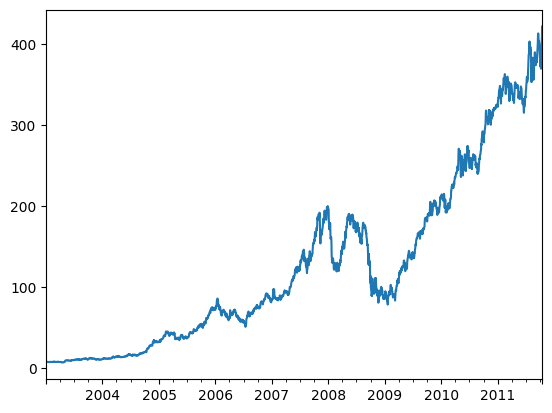

In [269]:
# AAPL 주가 시각화
close_px["AAPL"].plot()

#### rolling 연산
- Series나 DataFrame에서 원하는 기간을 나타내는 window 값으로 호출
- rolling 함수는 고정된 크기의 기간 지정 문자열을 넘겨서 호출 가능 (ex. "20D")

<Axes: >

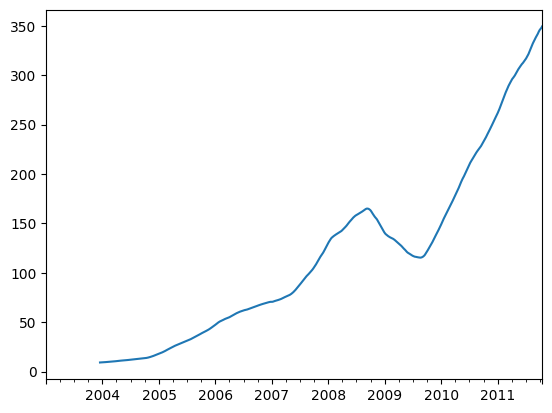

In [270]:
# rolling(250): 250일 크기의 움직이는 창을 통해 그룹핑할 수 있는 객체 생성

# 250일 일별 수익 표준편차
close_px["AAPL"].rolling(250).mean().plot()

<Axes: >

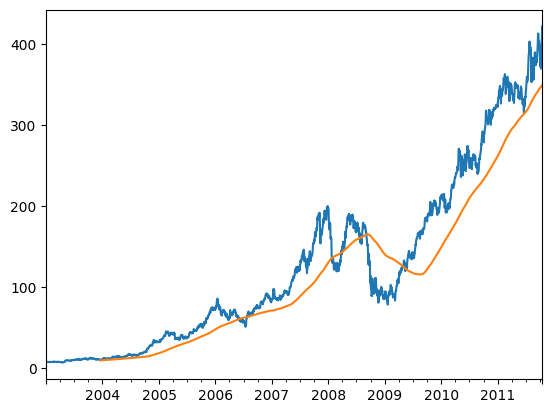

In [271]:
close_px["AAPL"].plot() # 애플 주가

close_px["AAPL"].rolling(250).mean().plot() # 애플 주가의 250일 이동평균

In [272]:
import matplotlib.pyplot as plt
%matplotlib inline

In [274]:
plt.figure()

# 애플의 250일 일별 수익 표준편차
std250 = close_px["AAPL"].pct_change().rolling(250, min_periods=10).std()
std250[5:12]

,AAPL
2003-01-09,NaN
2003-01-10,NaN
2003-01-13,NaN
2003-01-14,NaN
2003-01-15,NaN
2003-01-16,0.009628
2003-01-17,0.013818


<Figure size 640x480 with 0 Axes>

<Axes: >

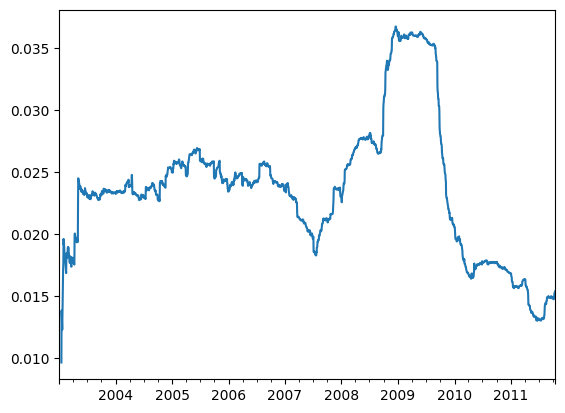

In [275]:
std250.plot()

#### expanding: 확장창 평균
- 확장창 평균: 시계열의 시작 지점에서부터 창의 크기가 시계열의 전체 크기가 될 때까지 점점 창의 크기를 늘림.
- DataFrame에 대해 이동창 함수 호출하면 각 열에 변환이 모두 적용됨

In [277]:
# std250 시계열의 확장창 평균 구하기
expanding_mean = std250.expanding().mean()
expanding_mean

,AAPL
2003-01-02,NaN
2003-01-03,NaN
2003-01-06,NaN
2003-01-07,NaN
2003-01-08,NaN
...,...
2011-10-10,0.023600
2011-10-11,0.023597
2011-10-12,0.023593
2011-10-13,0.023589


<Axes: >

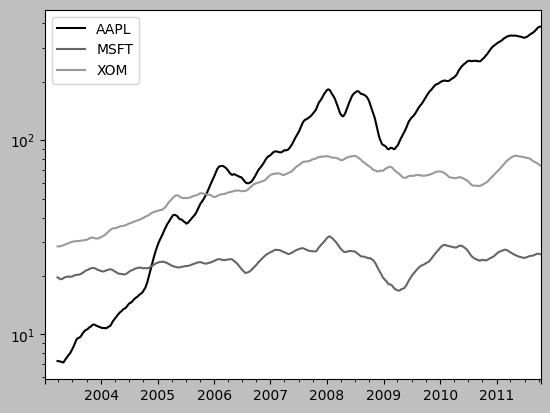

In [278]:
# DataFrame에 대해 이동창 함수 호출하면 각 열에 변환이 모두 적용됨
plt.style.use('grayscale')

# matplotlib.stye 모듈 관련: https://wikidocs.net/141547
# plt.style.use('ggplot')
# plt.style.use('classic')
# plt.style.use('Solarize_Light2')
# plt.style.use('default')

# 주가의 60일 이동 평균 그리기
close_px.rolling(60).mean().plot(logy=True)
# logy=True: 각 축에 대해 로그 스케일을 적용할지 여부를 나타내는 파라미터
# logy: Y축 로그 스케일

In [279]:
# rolling 함수는 고정된 크기의 기간 지정 문자열을 넘겨서 호출 가능

# 20일 크기의 이동평균 구하기
close_px.rolling("20D").mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


### 11.7.1 지수 가중 함수
- 지수 가중 통계: 최근 값에 더 많은 가중치를 두는 방법.
- 균등 가중 방식에 비해 더 빠르게 변화 수용
- 판다스는 rolling, expanding과 함께 사용할 수 있는 ewm 연산 제공

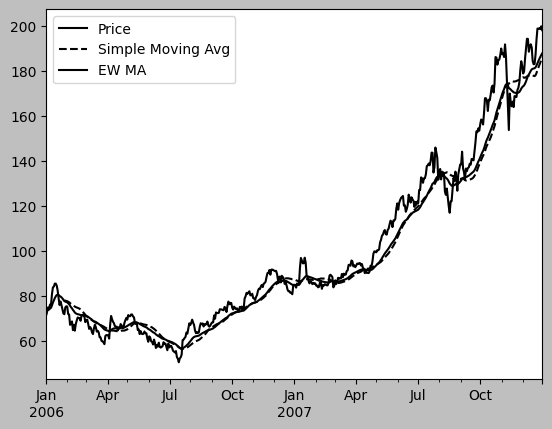

In [280]:
# 2006년 동안의 애플 주가
aapl_px = close_px["AAPL"]["2006":"2007"]

# 30일 이동평균
ma30 = aapl_px.rolling(30, min_periods=20).mean()

# 지수 가중 이동평균
ewma30 = aapl_px.ewm(span=30).mean()

# 데이터 시각화
aapl_px.plot(style="k-", label="Price")

ma30.plot(style="k--", label="Simple Moving Avg")

ewma30.plot(style="k-", label="EW MA")

# 범례 설정
plt.legend()

### 11.7.2 이진 이동창 함수
- corr 집계 함수는 상관관계 계산

In [282]:
spx_px = close_px_all["SPX"]

# 백분율 변화 계산
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

<Axes: >

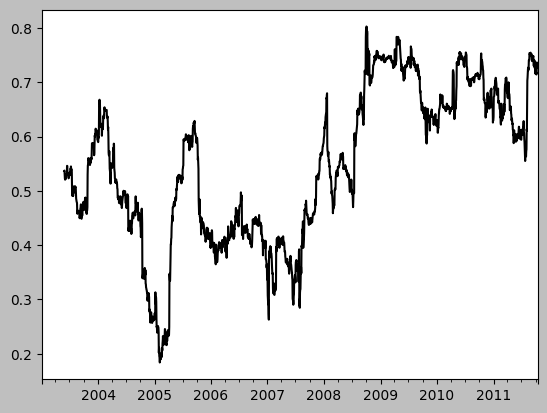

In [283]:
# 상관관계 계산

# S&P 500 지수와 애플 수익 상관관계
corr = returns["AAPL"].rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

<Axes: >

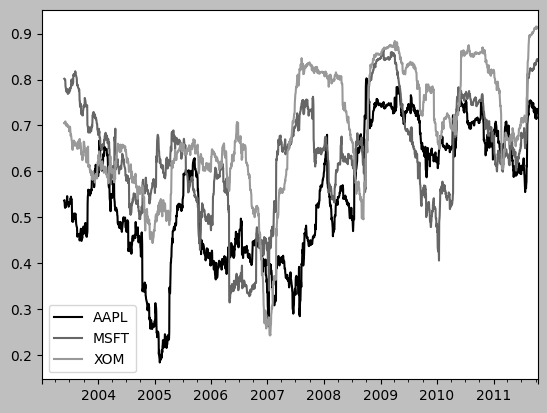

In [284]:
# 여러 주식과 S&P500 지수와의 상관관계 계산

# 각 주식이 단일 DataFrame의 열로 존재할 경우 해당 DataFrame에 대해 rolling 호출 후 corr 메서드에 Series 넘기면 됨
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

### 11.7.3 사용자 정의 이동창 함수
- rolling이나 다른 관련 메서드에 apply 호출하여 이동창에서 사용자 정의 연산 수행 가능
- 요구 사항은 사용자 정의 함수가 배열의 각 조각으로부터 단일 값 반환
- scipy.stats.percentileofscore 함수

In [ ]:
# !pip install scipy

In [285]:
from scipy.stats import percentileofscore

<Axes: >

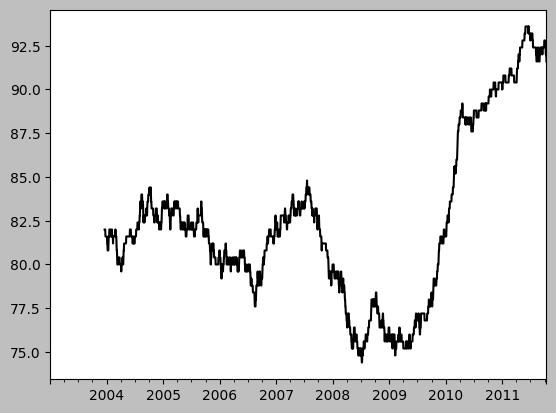

In [286]:
# 사용자 정의 함수 정의
def score_at_2percent(x):
  return percentileofscore(x, 0.02) # 2% 의 연간 수익률

# 2%의 연간 애플 수익률에 대한 백분위 점수 구하기
result = returns["AAPL"].rolling(250).apply(score_at_2percent)

result.plot()